In [20]:
import numpy as np
import pandas as pd
import os 

dir_list = ['/data/hpa/colon/distance_matrices', '/data/hpa/colon/healthy_distance_matrices', '/data/hpa/colon/cancer_distance_matrices']

df = pd.DataFrame(columns=['image_a', 'image_b', 'c_dist'])

for file_dir in dir_list:
    for cache in os.listdir(file_dir):
        data = np.load(os.path.join(file_dir, cache))
        df = df.append(pd.DataFrame(data, columns=['image_a', 'image_b', 'c_dist']))

In [21]:
df = df[df['image_a']!=df['image_b']]
len(df)

575528

In [22]:
df = df.drop_duplicates(subset=['image_a', 'image_b'])
df['image_a_type'] = df.apply(lambda row: row['image_a'].split('/')[6], axis=1)
df['image_b_type'] = df.apply(lambda row: row['image_b'].split('/')[6], axis=1)
df['gene'] = df.apply(lambda row: row['image_a'].split('/')[4], axis=1)
df['type_change'] = df.apply(lambda row: 1 if row['image_a_type']!=row['image_b_type'] else 0, axis=1)

In [53]:
print(df.groupby(['type_change']).mean())

             c_dist_val
type_change            
0              0.107934
1              0.153361


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b781ce978>,
      dtype=object)

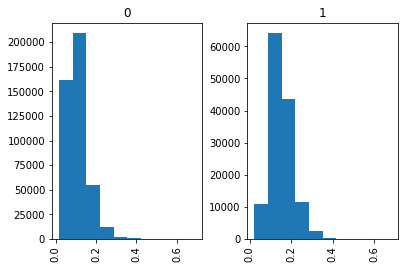

In [50]:
df['c_dist_val'].hist(by=df['type_change'])

In [39]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, precision_recall_curve


def plot_roc_curve(y_true, y_pred, title):
    plt.figure()
    lw=2
    fpr, tpr, thresh = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    plt.plot(fpr, tpr, color='green', lw=lw, label='AUROC: {:0.3f}'.format(auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [45]:
df['c_dist_val'] = df.apply(lambda row: float(row['c_dist']), axis=1)

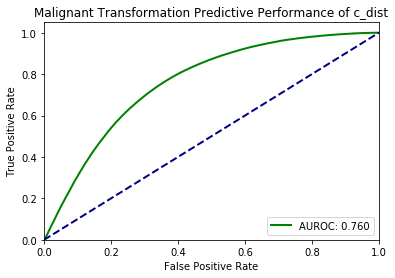

In [46]:
plot_roc_curve(df['type_change'], df['c_dist_val'], 'Malignant Transformation Predictive Performance of c_dist')